# Ultimate Technologies Inc. Take-Home Challenge
Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [3]:
logins_df = pd.read_json('logins.json')

logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins_df.shape

(93142, 1)

In [5]:
type(logins_df.login_time[0])

pandas._libs.tslibs.timestamps.Timestamp

In [6]:
logins_df.describe()

C:\Users\marcj\AppData\Local\Temp\ipykernel_41460\1127183450.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins_df.describe()


,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


Note: This data seems to be just a series of timestamps. I think the best strategy is to seperate the data into month, day of the week, and time (by 15 minute intervals).

In [7]:
logins_df['day_of_week'] = logins_df['login_time'].dt.dayofweek

logins_df['month'] = logins_df['login_time'].dt.month

logins_df['time'] = pd.to_datetime(logins_df['login_time']).dt.floor('15min').dt.time

logins_df.head()

,login_time,day_of_week,month,time
0,1970-01-01 20:13:18,3,1,20:00:00
1,1970-01-01 20:16:10,3,1,20:15:00
2,1970-01-01 20:16:37,3,1,20:15:00
3,1970-01-01 20:16:36,3,1,20:15:00
4,1970-01-01 20:26:21,3,1,20:15:00


In [8]:
type(logins_df['time'][0])

datetime.time

<AxesSubplot: xlabel='month'>

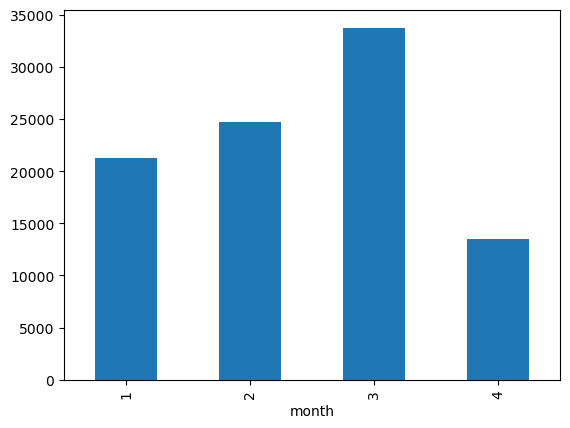

In [9]:
logins_df.groupby('month').count()['login_time'].plot(kind='bar')

### Monthly Analysis
It looks like the amount of logins increase progressively with every month. The data was cut off in the middle of April, so we only have partial information on how many logins would have occured.

<AxesSubplot: xlabel='day_of_week'>

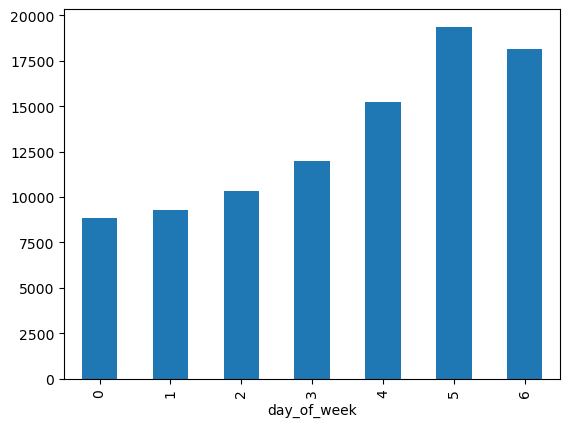

In [10]:
logins_df.groupby('day_of_week').count()['login_time'].plot(kind='bar')

### Weekly Analysis
It seems that the week progressively increases in logins until it peaks on Friday. It will be interesting to breakdown the actual timing to see if the weekends had any effect on the overall number of logins.

<AxesSubplot: xlabel='time'>

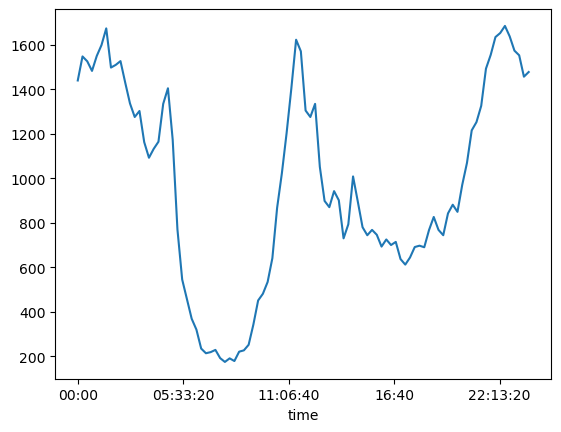

In [11]:
logins_df.groupby('time').count()['login_time'].plot(kind='line')

### Daily Analysis
Logins seem to generally drop off after 5am, pick up again around midday, only to lag around the eveningtime. This may indicate early-risers or even commutes. It will be interesting to see whether this changes based on the day of the week.

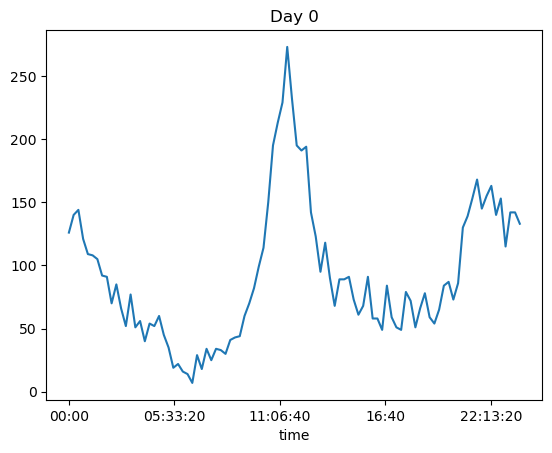

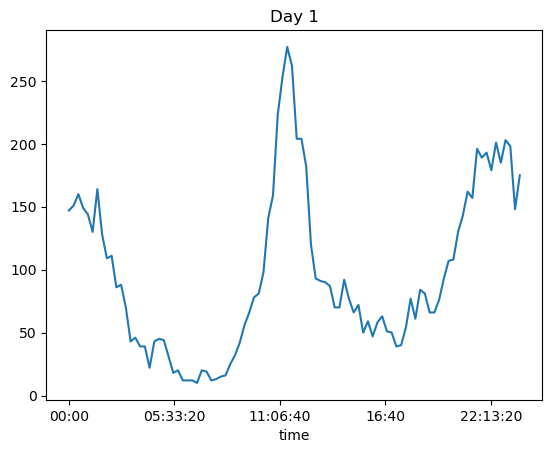

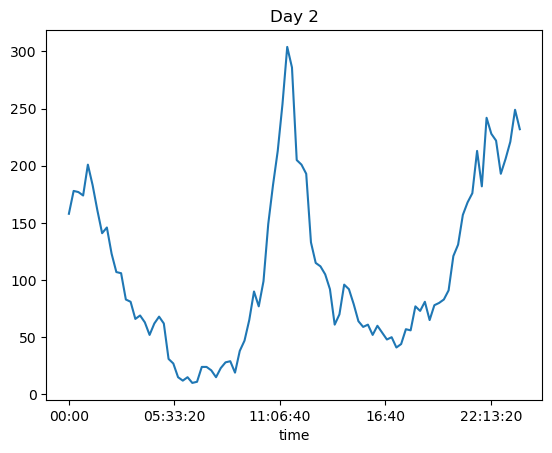

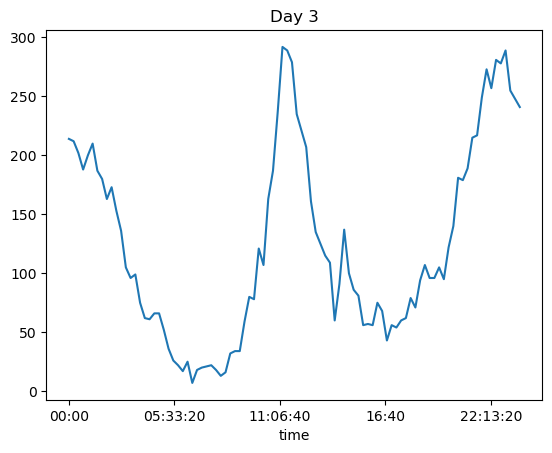

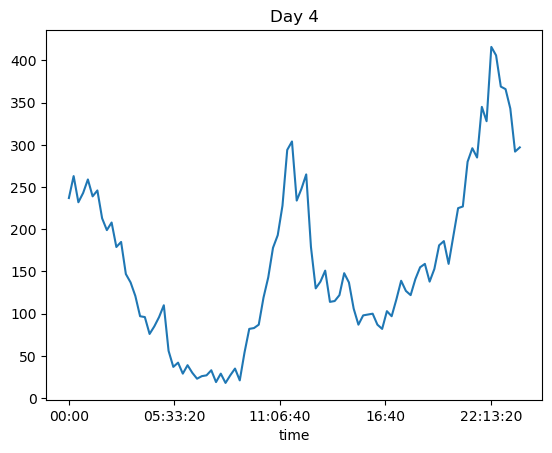

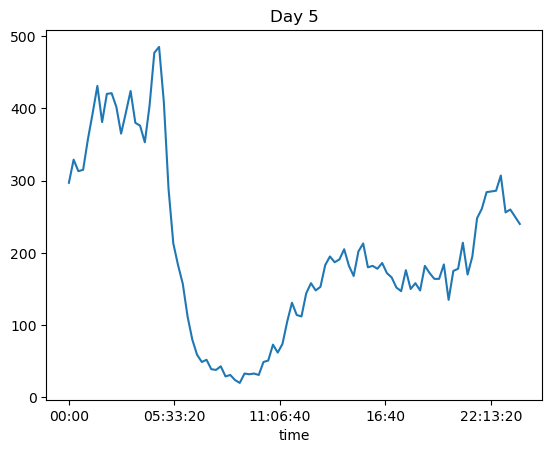

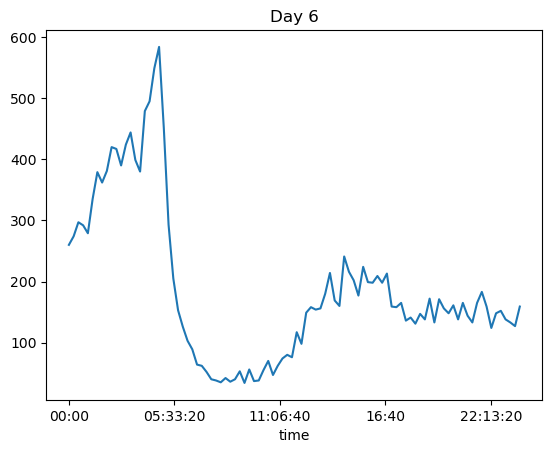

In [12]:
for day in [0, 1, 2, 3, 4, 5, 6]:
    plt.figure()
    plt.title(f"Day {day}")
    logins_df[logins_df['day_of_week'] == day].groupby('time').count()['login_time'].plot(kind='line')

### Part 1 - Conclusion
Sunday through Thursday maintain a regular schedule for the week similar to what was mentioned above. The anomalous days are Friday and Saturday. They seem to have particularly heavy early-morning logins.

## Part 2 - Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
<br></br>
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
<br></br>
*Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.*

### Question 1:
What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

### Answer 1:
The Key Performance Indicators (KPIs) could potentially be the amount of tolls reimbursed per driver partner (by total amount or by number of crossings, as long as the metric appears), the average distance driven by the driver partner, or a combination of the two.

### Question 2:
Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
<br></br>
1. How you will implement the experiment.
2. What statistical test(s) you will conduct to verify the significance of the observation.
3. How you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Answer 2:
1. The proposed experiment of toll reimbursement will allow us to directly compare the level of bridge utilization by our driver partners. We would need to have a control set as well, so we would need to divide our driver partners by an even metric that would not take their performance into account, such as device operating system (A/B Testing). To formalize this: we could provide an iPhone exclusive promotion that would allow for bridge reimbursement. This would split our data and allow us to compare our control (our Android app users) with our experimental set (our iPhone app users) and allow us to save money on the amount reimbursed.
2. We have a hypothesis here: 'Toll reimbursement will lead to a wider availability of multiple-city drivers.' We would need to test this hypothesis via the above experiment and analyze the results in order to accept or reject the hypothesis. We can use a two-sample z-test:
<br>![two-sample z-test formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd9e493bfa47350881aa8accd4c3ae476f169969)</br>
as our test statistic to determine the significance of the hypothesis. The metric for the hypothesis testing would be one of our KPIs based on the features collected.
3. The results of the hypothsis would indicate which suggestions should be made to better the business. If the hypothesis is correct, we would need to determine the financial and logistic characteristics to implement the proposed change.

## Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
<br></br>We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
<br></br>The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

### Question 1:
Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [119]:
'''
The first that needs to be done is some exploratory analysis of the data provided in the json file.
We know we will have to focus on 6-Month retention based on the next question,
so we are going to need to create a metric that indicates that.
'''
full_data = pd.read_json('ultimate_data_challenge.json')
full_data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [120]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [121]:
# There are some missing data point that need to be filled in.
# Based on the description of the data, filling the nan values with the mean should be a logical choice.
# The types for the dates are not in datetime, so we will need to change that as well.

full_data['avg_rating_of_driver'].fillna(value = full_data['avg_rating_of_driver'].mean(), inplace = True)
full_data['avg_rating_by_driver'].fillna(value = full_data['avg_rating_by_driver'].mean(), inplace = True)

full_data['signup_date'] = pd.to_datetime(full_data['signup_date'])
full_data['last_trip_date'] = pd.to_datetime(full_data['last_trip_date'])

full_data['phone'].fillna('', inplace = True)

full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [122]:
# We also need a metric that determines the difference between signup and last trip.

full_data['length_of_use'] = (full_data['last_trip_date'] - full_data['signup_date']).dt.days

full_data['6_month'] = np.nan

for value in tqdm(range((len(full_data['length_of_use'])))):
    if full_data['length_of_use'][value] >= 180:
        full_data['6_month'][value] = 1
    else:
        full_data['6_month'][value] = 0

full_data.head()

  0%|          | 0/50000 [00:00<?, ?it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_41460\3257144443.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['6_month'][value] = 0
  3%|▎         | 1607/50000 [00:04<02:38, 305.09it/s]C:\Users\marcj\AppData\Local\Temp\ipykernel_41460\3257144443.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data['6_month'][value] = 1
100%|██████████| 50000/50000 [02:01<00:00, 410.58it/s]


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,length_of_use,6_month
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,143,0.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,96,0.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,1,0.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,170,0.0
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,47,0.0


In [123]:
# At this point, we can investigate Pearson correlations between the various features.
full_data.corr()['6_month']

C:\Users\marcj\AppData\Local\Temp\ipykernel_41460\331571728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  full_data.corr()['6_month']


trips_in_first_30_days    0.016430
avg_rating_of_driver      0.000664
avg_surge                 0.000885
surge_pct                 0.003490
ultimate_black_user       0.004957
weekday_pct               0.002816
avg_dist                 -0.009696
avg_rating_by_driver     -0.001028
length_of_use             0.058026
6_month                   1.000000
Name: 6_month, dtype: float64

0.0    49915
1.0       85
Name: 6_month, dtype: int64
Retention Fraction: city                      0.0017
trips_in_first_30_days    0.0017
signup_date               0.0017
avg_rating_of_driver      0.0017
avg_surge                 0.0017
last_trip_date            0.0017
phone                     0.0017
surge_pct                 0.0017
ultimate_black_user       0.0017
weekday_pct               0.0017
avg_dist                  0.0017
avg_rating_by_driver      0.0017
length_of_use             0.0017
6_month                   0.0017
dtype: float64


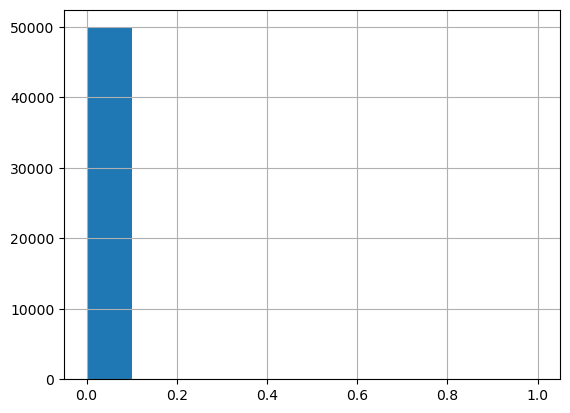

In [124]:
full_data['6_month'].hist()

print(full_data['6_month'].value_counts())
print('Retention Fraction:', full_data[full_data['6_month'] == 1].count() / full_data['6_month'].count())

The fraction of the drivers who were retained for 180 days or more is less than 1%. This will make any model we have tough to rely upon due to lopsided data.

### Question 2:
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [129]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [132]:
'''
We need to determine some key features to use and which model to use.
Selecting the best model with the best features will give us the best results.
Features to include:
['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'ultimate_black_user', 'avg_dist', 'avg_rating_by_driver']]
'''

features = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'avg_dist', 'avg_rating_by_driver']
X = full_data[features]
y = full_data['6_month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models = clf.fit(X_train, X_test, y_train, y_test)
models



 10%|█         | 3/29 [00:05<00:40,  1.55s/it]c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
 38%|███▊      | 11/29 [00:55<01:15,  4

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
 Model                                                                           
 QuadraticDiscriminantAnalysis      0.98               0.53     0.53      0.99   
 GaussianNB                         0.98               0.53     0.53      0.99   
 DecisionTreeClassifier             1.00               0.51     0.51      1.00   
 NearestCentroid                    0.70               0.51     0.51      0.82   
 AdaBoostClassifier                 1.00               0.50     0.50      1.00   
 LogisticRegression                 1.00               0.50     0.50      1.00   
 SVC                                1.00               0.50     0.50      1.00   
 RidgeClassifierCV                  1.00               0.50     0.50      1.00   
 RidgeClassifier                    1.00               0.50     0.50      1.00   
 LinearSVC                          1.00               0.50     0.50      1.00   
 KNeighborsClass

In [133]:
# Looks like our best classifiers for this are:
# QuadraticDiscriminantAnalysis, GaussianNB, and DecisionTreeClassifier.
# It is important to compare these models to tune the hyperparameters of each model to see which will perform best.

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from scipy.stats import randint
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

QDAModel = QuadraticDiscriminantAnalysis()
QDA_model_params = {
    'reg_param': uniform(),
    'tol': uniform()
}
QDAclf = RandomizedSearchCV(QDAModel, param_distributions=QDA_model_params, n_iter = 10, cv = 10)

QDAModel_RSCV = QDAclf.fit(X_train, y_train)
QDAModel_RSCV_score = QDAModel_RSCV.best_estimator_.score(X_test, y_test)

GNBModel = GaussianNB()
GNB_model_params = {
    'var_smoothing': uniform(),
}
GNBclf = RandomizedSearchCV(GNBModel, param_distributions=GNB_model_params, n_iter = 10, cv = 10)

GNBModel_RSCV = GNBclf.fit(X_train, y_train)
GNBModel_RSCV_score = GNBModel_RSCV.best_estimator_.score(X_test, y_test)

DTModel = DecisionTreeClassifier()
DT_model_params = {
    'max_depth': randint(1, 10),
    'min_samples_leaf': randint(1, 10),
}
DTclf = RandomizedSearchCV(DTModel, param_distributions=DT_model_params, n_iter = 10, cv = 10)

DTModel_RSCV = DTclf.fit(X_train, y_train)
DTModel_RSCV_score = DTModel_RSCV.best_estimator_.score(X_test, y_test)

print("QDAModel_RSCV_score:", QDAModel_RSCV_score)
print("GNBModel_RSCV_score:", GNBModel_RSCV_score)
print("DTModel_RSCV_score:", DTModel_RSCV_score)

c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
c:\Users\marcj\anaconda3\envs\mkolb\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.

QDAModel_RSCV_score: 0.99216
GNBModel_RSCV_score: 0.998
DTModel_RSCV_score: 0.99844


In [160]:
type(DTModel_RSCV.best_estimator_.feature_importances_[0])

numpy.float64

In [170]:
importances = pd.DataFrame(DTModel_RSCV.best_estimator_.feature_importances_, index=X.columns, columns=['importance'])

importances.sort_values(by='importance', ascending=False, inplace=True)

importances.head()

,importance
avg_dist,0.48
trips_in_first_30_days,0.21
avg_rating_of_driver,0.19
avg_surge,0.10
avg_rating_by_driver,0.02


A few notes about the model:
1. The model is based off of a very lopsided set of data whereas the number of drivers that have achieved 180 days is minimal. This will affect the accuracy of the model.
2. We can lower the amount of days for retention in order to make the model more accurate, but it would be less useful than determining 180-day retention.
3. The key indicators above are in order of their importance. Trips in the first 30 days can potentially indicate how dedicated the driver is to the job while distance can also indicate the amount of time and effort put into the job on a regular basis.

## Question 3:
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

## Answer 3:
The insights gained from this model indicate that incentives given in the first 30 days will have a positive effect on driver retention. Another indicator for driver retention that can be acted upon is distance driven. Toll reimbursement for drivers who make a certain quota could have a positive impact on driver retention.
